In [1]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
import DC_Pickle as dcp
import Curve_Functions as cv
import matplotlib.pyplot as plt
%matplotlib inline

def disp_Data(x, y_true, y_pred, file_path, clt_num, cost, rows=1, columns=1):
    fig, ax = plt.subplots(rows, columns)
    ax.plot(x, y_true, '.', c='black', label='average score')
    ax.plot(x, y_pred, 'b-', label='curve fitting', linewidth=4)
    ax.set_xlim([0, max(x)+1])
    ax.set_ylim([0, max(y_true)+0.2])
    ax.legend(fontsize=14)
    ax.set_title("Cluster {0}: {1} errors loss".format(clt_num, round(cost, 2)))
    fig.savefig(file_path, dpi=100)
    plt.show()
    
train_idx = dcp.open_Pickle("../../data/pickles/clusters_origin/15attempts/indices/index13.pickle")
train_idx = train_idx[2] #2, 8

train_scores = dcp.open_Pickle('../../data/pickles/seperate_origin/eventValue.pickle')
train_scores = train_scores[:300, :]/1e+4
attempts15 = np.arange(15)+1
attempts300 = np.arange(300)+1

## filtering discontinuous under 15 attempts
idx_all = []
idx_pure = []

for i in range(train_scores.shape[1]):
    if not np.isnan(train_scores[:15, i]).any():
        idx_all.append(i)
        idx_pure.append(i)
    else:
        idx_all.append(np.nan)

train_scores = train_scores[:, idx_pure]
print("Training data set: {0}".format(np.shape(train_scores)))

## get cluster data and cluster average data (average is centroid)
nClt = 13
for i in range(nClt):
    name = "cluster{0}".format(i+1)
    globals()[name] = train_scores[:, train_idx==i] # get cluster data
    
    ## get cluster average data
    data = np.ones(300)
    for j in range(len(data)):
        avg = eval(name)[j, :]
        avg = np.sum(avg[~np.isnan(avg)])/len(avg[~np.isnan(avg)])
        data[j] = avg

    globals()["avg{0}".format(i+1)] = data
    
dcp.make_folders("../../Figs/curve_fitting/")

print("1:", np.shape(cluster1))
print("2:", np.shape(cluster2))
print("3:", np.shape(cluster3))
print("4:", np.shape(cluster4))
print("5:", np.shape(cluster5))
print("6:", np.shape(cluster6))
print("7:", np.shape(cluster7))
print("8:", np.shape(cluster8))
print("9:", np.shape(cluster9))
print("10:", np.shape(cluster10))
print("11:", np.shape(cluster11))
print("12:", np.shape(cluster12))
print("13:", np.shape(cluster13))

Training data set: (300, 22832)
../../Figs/curve_fitting/ already present - Skipping pickling.
1: (300, 2045)
2: (300, 1709)
3: (300, 1354)
4: (300, 1894)
5: (300, 1930)
6: (300, 2093)
7: (300, 1187)
8: (300, 1988)
9: (300, 1678)
10: (300, 1403)
11: (300, 2489)
12: (300, 1802)
13: (300, 1260)


In [2]:
## 1 ##
def polynomial_curve1(x, w0, w1):
    return w0 + w1*x

def polynomial_least1(w, x, y):
    return polynomial_curve1(x, w[0], w[1]) - y

## 2 ##
def polynomial_curve2(x, w0, w1, w2):
    return w0 + w1*x + w2*x**2

def polynomial_least2(w, x, y):
    return polynomial_curve2(x, w[0], w[1], w[2]) - y

## 3 ##
def polynomial_curve3(x, w0, w1, w2, w3):
    return w0 + w1*x + w2*x**2 + w2*x**3

def polynomial_least3(w, x, y):
    return polynomial_curve3(x, w[0], w[1], w[2], w[3]) - y

## 4 ##
def polynomial_curve4(x, w0, w1, w2, w3, w4):
    return w0 + w1*x + w2*x**2 + w3*x**3 + w4*x**4

def polynomial_least4(w, x, y):
    return polynomial_curve4(x, w[0], w[1], w[2], w[3], w[4]) - y

## 5 ##
def polynomial_curve5(x, w0, w1, w2, w3, w4, w5):
    return w0 + w1*x + w2*x**2 + w3*x**3 + w4*x**4 + w5*x**5

def polynomial_least5(w, x, y):
    return polynomial_curve5(x, w[0], w[1], w[2], w[3], w[4], w[5]) - y

## 6 ##
def polynomial_curve6(x, w0, w1, w2, w3, w4, w5, w6):
    return w0 + w1*x + w2*x**2 + w3*x**3 + w4*x**4 + w5*x**5 + w6*x**6

def polynomial_least6(w, x, y):
    return polynomial_curve6(x, w[0], w[1], w[2], w[3], w[4], w[5], w[6]) - y

## 7 ##
def polynomial_curve7(x, w0, w1, w2, w3, w4, w5, w6, w7):
    return w0 + w1*x + w2*x**2 + w3*x**3 + w4*x**4 + w5*x**5 + w6*x**6 + w7*x**7

def polynomial_least7(w, x, y):
    return polynomial_curve7(x, w[0], w[1], w[2], w[3], w[4], w[5], w[6], w[7]) - y

## 8 ##
def polynomial_curve8(x, w0, w1, w2, w3, w4, w5, w6, w7, w8):
    return w0 + w1*x + w2*x**2 + w3*x**3 + w4*x**4 + w5*x**5 + w6*x**6 + w7*x**7 + w8*x**8

def polynomial_least8(w, x, y):
    return polynomial_curve8(x, w[0], w[1], w[2], w[3], w[4], w[5], w[6], w[7], w[8]) - y

## 9 ##
def polynomial_curve9(x, w0, w1, w2, w3, w4, w5, w6, w7, w8, w9):
    return w0 + w1*x + w2*x**2 + w3*x**3 + w4*x**4 + w5*x**5 + w6*x**6 + w7*x**7 + w8*x**8 + w9*x**9

def polynomial_least9(w, x, y):
    return polynomial_curve9(x, w[0], w[1], w[2], w[3], w[4], w[5], w[6], w[7], w[8], w[9]) - y

## 10 ##
def polynomial_curve10(x, w0, w1, w2, w3, w4, w5, w6, w7, w8, w9, w10):
    return w0 + w1*x + w2*x**2 + w3*x**3 + w4*x**4 + w5*x**5 + w6*x**6 + w7*x**7 + w8*x**8 + w9*x**9 + w10*x**10

def polynomial_least10(w, x, y):
    return polynomial_curve10(x, w[0], w[1], w[2], w[3], w[4], w[5], w[6], w[7], w[8], w[9], w[10]) - y

# First

../../Figs/curve_fitting/SingleCurves/Polynomial/1/ already present - Skipping pickling.
0
../../data/pickles/Fitting/300Attempts/Polynomial/1/avg1 already present - Skipping pickling.
1
../../data/pickles/Fitting/300Attempts/Polynomial/1/avg2 already present - Skipping pickling.
2
../../data/pickles/Fitting/300Attempts/Polynomial/1/avg3 already present - Skipping pickling.
3
../../data/pickles/Fitting/300Attempts/Polynomial/1/avg4 already present - Skipping pickling.
4
../../data/pickles/Fitting/300Attempts/Polynomial/1/avg5 already present - Skipping pickling.
5
../../data/pickles/Fitting/300Attempts/Polynomial/1/avg6 already present - Skipping pickling.
6
../../data/pickles/Fitting/300Attempts/Polynomial/1/avg7 already present - Skipping pickling.
7
../../data/pickles/Fitting/300Attempts/Polynomial/1/avg8 already present - Skipping pickling.
8
../../data/pickles/Fitting/300Attempts/Polynomial/1/avg9 already present - Skipping pickling.
9
../../data/pickles/Fitting/300Attempts/Polyno

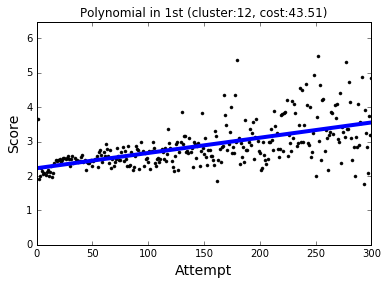

In [7]:
x_range = np.linspace(1, 300, 300)

dcp.make_folders("../../Figs/curve_fitting/SingleCurves/Polynomial/1/")
for i in range(nClt):
    print(i)
    plt.clf()
    
    avg = "avg{0}".format(i+1)
    lsq = least_squares(polynomial_least1, [1, 1], args=(x_range, eval(avg)))

    y_fit = polynomial_curve1(x_range, lsq.x[0], lsq.x[1])

    plt.plot(x_range, eval(avg), '.', c='black', label="average score")
    plt.plot(x_range, y_fit, 'b-', label="curve fitting", linewidth=4) 
    
    plt.title("Polynomial in 1st (cluster:{0}, cost:{1})".format(i, round(lsq.cost, 2)))
    plt.ylim([0, max( eval("avg{0}".format(i+1)) )+1])
    plt.ylabel('Score', fontsize=14)
    plt.xlabel('Attempt', fontsize=14)
    
    plt.savefig("../../Figs/curve_fitting/SingleCurves/Polynomial/1/avg{0}".format(i+1), dpi=100)
    
    dcp.make_folders('../../data/pickles/Fitting/300Attempts/Polynomial/1/avg{0}'.format(i+1))
    dcp.make_Pickle(lsq.cost, '../../data/pickles/Fitting/300Attempts/Polynomial/1/avg{0}/cost.pickle'.format(i+1), force=True)
    dcp.make_Pickle(lsq.x, '../../data/pickles/Fitting/300Attempts/Polynomial/1/avg{0}/param.pickle'.format(i+1), force=True)

# Second

../../Figs/curve_fitting/SingleCurves/Polynomial/2/ already present - Skipping pickling.
0
../../data/pickles/Fitting/300Attempts/Polynomial/2/avg1 already present - Skipping pickling.
1
../../data/pickles/Fitting/300Attempts/Polynomial/2/avg2 already present - Skipping pickling.
2
../../data/pickles/Fitting/300Attempts/Polynomial/2/avg3 already present - Skipping pickling.
3
../../data/pickles/Fitting/300Attempts/Polynomial/2/avg4 already present - Skipping pickling.
4
../../data/pickles/Fitting/300Attempts/Polynomial/2/avg5 already present - Skipping pickling.
5
../../data/pickles/Fitting/300Attempts/Polynomial/2/avg6 already present - Skipping pickling.
6
../../data/pickles/Fitting/300Attempts/Polynomial/2/avg7 already present - Skipping pickling.
7
../../data/pickles/Fitting/300Attempts/Polynomial/2/avg8 already present - Skipping pickling.
8
../../data/pickles/Fitting/300Attempts/Polynomial/2/avg9 already present - Skipping pickling.
9
../../data/pickles/Fitting/300Attempts/Polyno

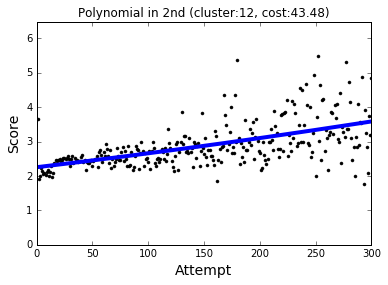

In [9]:
x_range = np.linspace(1, 300, 300)
dcp.make_folders("../../Figs/curve_fitting/SingleCurves/Polynomial/2/")
for i in range(nClt):
    print(i)
    plt.clf()
    
    avg = "avg{0}".format(i+1)
    lsq = least_squares(polynomial_least2, [1, 1, 1], args=(x_range, eval(avg)))
    y_fit = polynomial_curve2(x_range, lsq.x[0], lsq.x[1], lsq.x[2])

    plt.plot(x_range, eval(avg), '.', c='black', label="average score")
    plt.plot(x_range, y_fit, 'b-', label="curve fitting", linewidth=4) 
    
    plt.title("Polynomial in 2nd (cluster:{0}, cost:{1})".format(i, round(lsq.cost, 2)))
    plt.ylim([0, max( eval("avg{0}".format(i+1)) )+1])
    plt.ylabel('Score', fontsize=14)
    plt.xlabel('Attempt', fontsize=14)
    
    plt.savefig("../../Figs/curve_fitting/SingleCurves/Polynomial/2/avg{0}".format(i+1), dpi=100)
    
    dcp.make_folders('../../data/pickles/Fitting/300Attempts/Polynomial/2/avg{0}'.format(i+1))
    dcp.make_Pickle(lsq.cost, '../../data/pickles/Fitting/300Attempts/Polynomial/2/avg{0}/cost.pickle'.format(i+1), force=True)
    dcp.make_Pickle(lsq.x, '../../data/pickles/Fitting/300Attempts/Polynomial/2/avg{0}/param.pickle'.format(i+1), force=True)

# Third

../../Figs/curve_fitting/SingleCurves/Polynomial/3/ already present - Skipping pickling.
0
../../data/pickles/Fitting/300Attempts/Polynomial/3/avg1 already present - Skipping pickling.
1
../../data/pickles/Fitting/300Attempts/Polynomial/3/avg2 already present - Skipping pickling.
2
../../data/pickles/Fitting/300Attempts/Polynomial/3/avg3 already present - Skipping pickling.
3
../../data/pickles/Fitting/300Attempts/Polynomial/3/avg4 already present - Skipping pickling.
4
../../data/pickles/Fitting/300Attempts/Polynomial/3/avg5 already present - Skipping pickling.
5
../../data/pickles/Fitting/300Attempts/Polynomial/3/avg6 already present - Skipping pickling.
6
../../data/pickles/Fitting/300Attempts/Polynomial/3/avg7 already present - Skipping pickling.
7
../../data/pickles/Fitting/300Attempts/Polynomial/3/avg8 already present - Skipping pickling.
8
../../data/pickles/Fitting/300Attempts/Polynomial/3/avg9 already present - Skipping pickling.
9
../../data/pickles/Fitting/300Attempts/Polyno

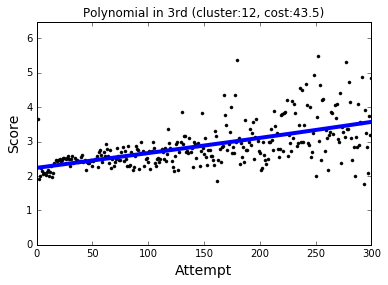

In [13]:
x_range = np.linspace(1, 300, 300)
dcp.make_folders("../../Figs/curve_fitting/SingleCurves/Polynomial/3/")
for i in range(nClt):
    print(i)
    plt.clf()
    
    avg = "avg{0}".format(i+1)
    lsq = least_squares(polynomial_least3, [1, 1, 1, 1], args=(x_range, eval(avg)))
    y_fit = polynomial_curve3(x_range, lsq.x[0], lsq.x[1], lsq.x[2], lsq.x[3])

    plt.plot(x_range, eval(avg), '.', c='black', label="average score")
    plt.plot(x_range, y_fit, 'b-', label="curve fitting", linewidth=4) 
    
    plt.title("Polynomial in 3rd (cluster:{0}, cost:{1})".format(i, round(lsq.cost, 2)))
    plt.ylim([0, max( eval("avg{0}".format(i+1)) )+1])
    plt.ylabel('Score', fontsize=14)
    plt.xlabel('Attempt', fontsize=14)
    
    plt.savefig("../../Figs/curve_fitting/SingleCurves/Polynomial/3/avg{0}".format(i+1), dpi=100)
    
    dcp.make_folders('../../data/pickles/Fitting/300Attempts/Polynomial/3/avg{0}'.format(i+1))
    dcp.make_Pickle(lsq.cost, '../../data/pickles/Fitting/300Attempts/Polynomial/3/avg{0}/cost.pickle'.format(i+1), force=True)
    dcp.make_Pickle(lsq.x, '../../data/pickles/Fitting/300Attempts/Polynomial/3/avg{0}/param.pickle'.format(i+1), force=True)

# Fourth

../../Figs/curve_fitting/SingleCurves/Polynomial/4/ already present - Skipping pickling.
0
../../data/pickles/Fitting/300Attempts/Polynomial/4/avg1 already present - Skipping pickling.
1
../../data/pickles/Fitting/300Attempts/Polynomial/4/avg2 already present - Skipping pickling.
2
../../data/pickles/Fitting/300Attempts/Polynomial/4/avg3 already present - Skipping pickling.
3
../../data/pickles/Fitting/300Attempts/Polynomial/4/avg4 already present - Skipping pickling.
4
../../data/pickles/Fitting/300Attempts/Polynomial/4/avg5 already present - Skipping pickling.
5
../../data/pickles/Fitting/300Attempts/Polynomial/4/avg6 already present - Skipping pickling.
6
../../data/pickles/Fitting/300Attempts/Polynomial/4/avg7 already present - Skipping pickling.
7
../../data/pickles/Fitting/300Attempts/Polynomial/4/avg8 already present - Skipping pickling.
8
../../data/pickles/Fitting/300Attempts/Polynomial/4/avg9 already present - Skipping pickling.
9
../../data/pickles/Fitting/300Attempts/Polyno

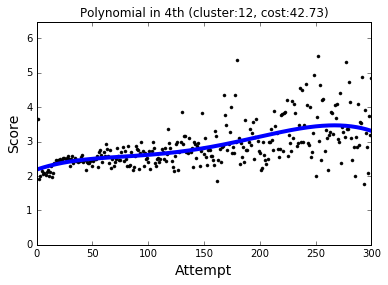

In [14]:
x_range = np.linspace(1, 300, 300)
dcp.make_folders("../../Figs/curve_fitting/SingleCurves/Polynomial/4/")
for i in range(nClt):
    print(i)
    plt.clf()
    
    avg = "avg{0}".format(i+1)
    lsq = least_squares(polynomial_least4, [1, 1, 1, 1, 1], args=(x_range, eval(avg)))
    y_fit = polynomial_curve4(x_range, lsq.x[0], lsq.x[1], lsq.x[2], lsq.x[3], lsq.x[4])

    plt.plot(x_range, eval(avg), '.', c='black', label="average score")
    plt.plot(x_range, y_fit, 'b-', label="curve fitting", linewidth=4) 
    
    plt.title("Polynomial in 4th (cluster:{0}, cost:{1})".format(i, round(lsq.cost, 2)))
    plt.ylim([0, max( eval("avg{0}".format(i+1)) )+1])
    plt.ylabel('Score', fontsize=14)
    plt.xlabel('Attempt', fontsize=14)
    
    plt.savefig("../../Figs/curve_fitting/SingleCurves/Polynomial/4/avg{0}".format(i+1), dpi=100)
    
    dcp.make_folders('../../data/pickles/Fitting/300Attempts/Polynomial/4/avg{0}'.format(i+1))
    dcp.make_Pickle(lsq.cost, '../../data/pickles/Fitting/300Attempts/Polynomial/4/avg{0}/cost.pickle'.format(i+1), force=True)
    dcp.make_Pickle(lsq.x, '../../data/pickles/Fitting/300Attempts/Polynomial/4/avg{0}/param.pickle'.format(i+1), force=True)

# 5th

../../Figs/curve_fitting/SingleCurves/Polynomial/5/ already present - Skipping pickling.
0
../../data/pickles/Fitting/300Attempts/Polynomial/5/avg1 already present - Skipping pickling.
1
../../data/pickles/Fitting/300Attempts/Polynomial/5/avg2 already present - Skipping pickling.
2
../../data/pickles/Fitting/300Attempts/Polynomial/5/avg3 already present - Skipping pickling.
3
../../data/pickles/Fitting/300Attempts/Polynomial/5/avg4 already present - Skipping pickling.
4
../../data/pickles/Fitting/300Attempts/Polynomial/5/avg5 already present - Skipping pickling.
5
../../data/pickles/Fitting/300Attempts/Polynomial/5/avg6 already present - Skipping pickling.
6
../../data/pickles/Fitting/300Attempts/Polynomial/5/avg7 already present - Skipping pickling.
7
../../data/pickles/Fitting/300Attempts/Polynomial/5/avg8 already present - Skipping pickling.
8
../../data/pickles/Fitting/300Attempts/Polynomial/5/avg9 already present - Skipping pickling.
9
../../data/pickles/Fitting/300Attempts/Polyno

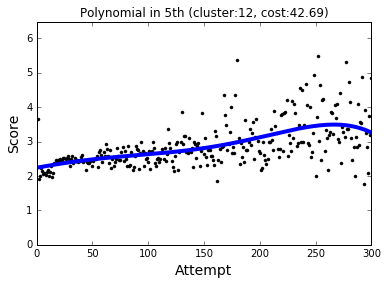

In [15]:
x_range = np.linspace(1, 300, 300)
dcp.make_folders("../../Figs/curve_fitting/SingleCurves/Polynomial/5/")
for i in range(nClt):
    print(i)
    plt.clf()
    
    avg = "avg{0}".format(i+1)
    lsq = least_squares(polynomial_least5, [1, 1, 1, 1, 1, 1], args=(x_range, eval(avg)))
    y_fit = polynomial_curve5(x_range, lsq.x[0], lsq.x[1], lsq.x[2], lsq.x[3], lsq.x[4], lsq.x[5])

    plt.plot(x_range, eval(avg), '.', c='black', label="average score")
    plt.plot(x_range, y_fit, 'b-', label="curve fitting", linewidth=4) 
    
    plt.title("Polynomial in 5th (cluster:{0}, cost:{1})".format(i, round(lsq.cost, 2)))
    plt.ylim([0, max( eval("avg{0}".format(i+1)) )+1])
    plt.ylabel('Score', fontsize=14)
    plt.xlabel('Attempt', fontsize=14)
    
    plt.savefig("../../Figs/curve_fitting/SingleCurves/Polynomial/5/avg{0}".format(i+1), dpi=100)
    
    dcp.make_folders('../../data/pickles/Fitting/300Attempts/Polynomial/5/avg{0}'.format(i+1))
    dcp.make_Pickle(lsq.cost, '../../data/pickles/Fitting/300Attempts/Polynomial/5/avg{0}/cost.pickle'.format(i+1), force=True)
    dcp.make_Pickle(lsq.x, '../../data/pickles/Fitting/300Attempts/Polynomial/5/avg{0}/param.pickle'.format(i+1), force=True)

# 6th

0
../../data/pickles/Fitting/300Attempts/Polynomial/6/avg1 already present - Skipping pickling.
1
../../data/pickles/Fitting/300Attempts/Polynomial/6/avg2 already present - Skipping pickling.
2
../../data/pickles/Fitting/300Attempts/Polynomial/6/avg3 already present - Skipping pickling.
3
../../data/pickles/Fitting/300Attempts/Polynomial/6/avg4 already present - Skipping pickling.
4
../../data/pickles/Fitting/300Attempts/Polynomial/6/avg5 already present - Skipping pickling.
5
../../data/pickles/Fitting/300Attempts/Polynomial/6/avg6 already present - Skipping pickling.
6
../../data/pickles/Fitting/300Attempts/Polynomial/6/avg7 already present - Skipping pickling.
7
../../data/pickles/Fitting/300Attempts/Polynomial/6/avg8 already present - Skipping pickling.
8
../../data/pickles/Fitting/300Attempts/Polynomial/6/avg9 already present - Skipping pickling.
9
../../data/pickles/Fitting/300Attempts/Polynomial/6/avg10 already present - Skipping pickling.
10
../../data/pickles/Fitting/300Attemp

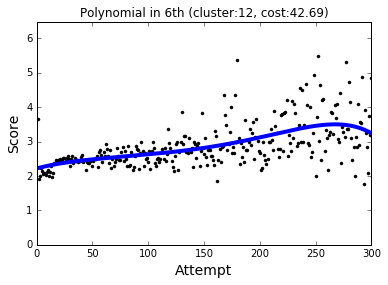

In [16]:
x_range = np.linspace(1, 300, 300)
dcp.make_folders("../../Figs/curve_fitting/SingleCurves/Polynomial/6/")
for i in range(nClt):
    print(i)
    plt.clf()
    
    avg = "avg{0}".format(i+1)
    lsq = least_squares(polynomial_least6, [1, 1, 1, 1, 1, 1, 1], args=(x_range, eval(avg)))
    y_fit = polynomial_curve6(x_range, lsq.x[0], lsq.x[1], lsq.x[2], lsq.x[3], lsq.x[4], lsq.x[5], lsq.x[6])

    plt.plot(x_range, eval(avg), '.', c='black', label="average score")
    plt.plot(x_range, y_fit, 'b-', label="curve fitting", linewidth=4) 
    
    plt.title("Polynomial in 6th (cluster:{0}, cost:{1})".format(i, round(lsq.cost, 2)))
    plt.ylim([0, max( eval("avg{0}".format(i+1)) )+1])
    plt.ylabel('Score', fontsize=14)
    plt.xlabel('Attempt', fontsize=14)
    
    plt.savefig("../../Figs/curve_fitting/SingleCurves/Polynomial/6/avg{0}".format(i+1), dpi=100)
    
    dcp.make_folders('../../data/pickles/Fitting/300Attempts/Polynomial/6/avg{0}'.format(i+1))
    dcp.make_Pickle(lsq.cost, '../../data/pickles/Fitting/300Attempts/Polynomial/6/avg{0}/cost.pickle'.format(i+1), force=True)
    dcp.make_Pickle(lsq.x, '../../data/pickles/Fitting/300Attempts/Polynomial/6/avg{0}/param.pickle'.format(i+1), force=True)

# 7th

In [ ]:
x_range = np.linspace(1, 300, 300)
dcp.make_folders("../../Figs/curve_fitting/MultiCurves/Polynomial/7/")
for i in range(nClt):
    print(i)
    plt.clf()
    
    avg = "avg{0}".format(i+1)
    lsq = least_squares(polynomial_least7, [1, 1, 1, 1, 1, 1, 1, 1], args=(x_range, eval(avg)))
    y_fit = polynomial_curve7(x_range, lsq.x[0], lsq.x[1], lsq.x[2], lsq.x[3], lsq.x[4], lsq.x[5], lsq.x[6], lsq.x[7])

    plt.plot(x_range, eval(avg), '.', c='black', label="average score")
    plt.plot(x_range, y_fit, 'b-', label="curve fitting", linewidth=4) 

    plt.title("Cluster {0}: {1} errors loss".format(i, round(lsq.cost, 2)))
    plt.ylim([0, max( eval("avg{0}".format(i+1)) )+1])
    
    plt.savefig("../../Figs/curve_fitting/MultiCurves/Polynomial/7/avg{0}".format(i+1), dpi=100)
    
    dcp.make_folders('../../data/pickles/Fitting/15Attempts/Polynomial/7/avg{0}'.format(i+1))
    dcp.make_Pickle(lsq.cost, '../../data/pickles/Fitting/15Attempts/Polynomial/7/avg{0}/cost.pickle'.format(i+1))
    dcp.make_Pickle(lsq.x, '../../data/pickles/Fitting/15Attempts/Polynomial/7/avg{0}/param.pickle'.format(i+1))

# 8th

In [ ]:
x_range = np.linspace(1, 300, 300)
dcp.make_folders("../../Figs/curve_fitting/MultiCurves/Polynomial/8/")
for i in range(nClt):
    print(i)
    plt.clf()
    
    avg = "avg{0}".format(i+1)
    lsq = least_squares(polynomial_least8, [1, 1, 1, 1, 1, 1, 1, 1, 1], args=(x_range, eval(avg)))
    y_fit = polynomial_curve8(x_range, lsq.x[0], lsq.x[1], lsq.x[2], lsq.x[3], lsq.x[4], lsq.x[5], lsq.x[6], lsq.x[7],
                             lsq.x[8])

    plt.plot(x_range, eval(avg), '.', c='black', label="average score")
    plt.plot(x_range, y_fit, 'b-', label="curve fitting", linewidth=4) 

    plt.title("Cluster {0}: {1} errors loss".format(i, round(lsq.cost, 2)))
    plt.ylim([0, max( eval("avg{0}".format(i+1)) )+1])

    plt.savefig("../../Figs/curve_fitting/MultiCurves/Polynomial/8/avg{0}".format(i+1), dpi=100)
    
    dcp.make_folders('../../data/pickles/Fitting/15Attempts/Polynomial/8/avg{0}'.format(i+1))
    dcp.make_Pickle(lsq.cost, '../../data/pickles/Fitting/15Attempts/Polynomial/8/avg{0}/cost.pickle'.format(i+1))
    dcp.make_Pickle(lsq.x, '../../data/pickles/Fitting/15Attempts/Polynomial/8/avg{0}/param.pickle'.format(i+1))

# 9th

In [ ]:
x_range = np.linspace(1, 300, 300)
dcp.make_folders("../../Figs/curve_fitting/MultiCurves/Polynomial/9/")
for i in range(nClt):
    print(i)
    plt.clf()
    
    avg = "avg{0}".format(i+1)
    lsq = least_squares(polynomial_least9, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], args=(x_range, eval(avg)))
    y_fit = polynomial_curve9(x_range, lsq.x[0], lsq.x[1], lsq.x[2], lsq.x[3], lsq.x[4], lsq.x[5], lsq.x[6], lsq.x[7],
                             lsq.x[8], lsq.x[9])

    plt.plot(x_range, eval(avg), '.', c='black', label="average score")
    plt.plot(x_range, y_fit, 'b-', label="curve fitting", linewidth=4) 

    plt.title("Cluster {0}: {1} errors loss".format(i, round(lsq.cost, 2)))
    plt.ylim([0, max( eval("avg{0}".format(i+1)) )+1])
    
    plt.savefig("../../Figs/curve_fitting/MultiCurves/Polynomial/9/avg{0}".format(i+1), dpi=100)
    
    dcp.make_folders('../../data/pickles/Fitting/15Attempts/Polynomial/9/avg{0}'.format(i+1))
    dcp.make_Pickle(lsq.cost, '../../data/pickles/Fitting/15Attempts/Polynomial/9/avg{0}/cost.pickle'.format(i+1))
    dcp.make_Pickle(lsq.x, '../../data/pickles/Fitting/15Attempts/Polynomial/9/avg{0}/param.pickle'.format(i+1))

# 10th

In [ ]:
x_range = np.linspace(1, 300, 300)
dcp.make_folders("../../Figs/curve_fitting/MultiCurves/Polynomial/10/")
for i in range(nClt):
    print(i)
    plt.clf()
    
    avg = "avg{0}".format(i+1)
    lsq = least_squares(polynomial_least10, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], args=(x_range, eval(avg)))
    y_fit = polynomial_curve10(x_range, lsq.x[0], lsq.x[1], lsq.x[2], lsq.x[3], lsq.x[4], lsq.x[5], lsq.x[6], lsq.x[7],
                             lsq.x[8], lsq.x[9], lsq.x[10])

    plt.plot(x_range, eval(avg), '.', c='black', label="average score")
    plt.plot(x_range, y_fit, 'b-', label="curve fitting", linewidth=4) 

    plt.title("Cluster {0}: {1} errors loss".format(i, round(lsq.cost, 2)))
    plt.ylim([0, max( eval("avg{0}".format(i+1)) )+1])

    plt.savefig("../../Figs/curve_fitting/MultiCurves/Polynomial/10/avg{0}".format(i+1), dpi=100)
    
    dcp.make_folders('../../data/pickles/Fitting/15Attempts/Polynomial/10/avg{0}'.format(i+1))
    dcp.make_Pickle(lsq.cost, '../../data/pickles/Fitting/15Attempts/Polynomial/10/avg{0}/cost.pickle'.format(i+1))
    dcp.make_Pickle(lsq.x, '../../data/pickles/Fitting/15Attempts/Polynomial/10/avg{0}/param.pickle'.format(i+1))

# Regularisation

In [19]:
import DC_Pickle as dcp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dcp.make_folders("../../Figs/curve_fitting/SingleCurves/Polynomial/Elbow")
for j in range(13): # for averages
    Elbow = []
    new_loss = []
    orders = np.linspace(1, 6, 6)
    for i in range(6): # for orders
        loss = dcp.open_Pickle('../../data/pickles/Fitting/300Attempts/Polynomial/{0}/avg{1}/cost.pickle'.format(i+1, j+1))
        param = dcp.open_Pickle('../../data/pickles/Fitting/300Attempts/Polynomial/{0}/avg{1}/param.pickle'.format(i+1, j+1))
        Elbow.append(loss)
        new_loss.append(loss + np.sum(param**2)*i*1.5 )
        
    plt.plot(orders, Elbow, '.', c='darkgreen')
    plt.plot(orders, Elbow, '-', c='g', label="Elbow")
    
    plt.plot(orders, new_loss, '.', c='darkred')
    plt.plot(orders, new_loss, '-', c='r', label="Regularisation")
    plt.legend()


    plt.title("Order {0}".format(i+1))
    #plt.ylim([0, max(Elbow)+10])

    plt.savefig("../../Figs/curve_fitting/SingleCurves/Polynomial/Elbow/{0}".format(j+1), dpi=100)
    plt.clf()

../../Figs/curve_fitting/SingleCurves/Polynomial/Elbow already present - Skipping pickling.
